# Import Necassary Libraries

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
sb.set()

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
songData = pd.read_csv('datasets\cleaned-song-dataset.csv')
songData

,Unnamed: 0,name,artists,popularity,release_date,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0,Keep A Song In Your Soul,['Mamie Smith'],12,1920-01-01,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0.0936,149.976,0.6340
1,1,I Put A Spell On You,"[""Screamin' Jay Hawkins""]",7,1920-05-01,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0.0534,86.889,0.9500
2,2,Golfing Papa,['Mamie Smith'],4,1920-01-01,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0.1740,97.600,0.6890
3,3,True House Music - Xavier Santos & Carlos Gomi...,['Oscar Velazquez'],17,1920-01-01,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0.0425,127.997,0.0422
4,4,Xuniverxe,['Mixe'],2,1920-01-10,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0.0768,122.076,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133479,174361,Little Boy,['Ashnikko'],61,2021-01-15,0.105000,0.781,172720,0.487,1,0.000000,1,0.0802,-7.301,0,0.1670,129.941,0.3270
133480,174370,Fortune and Joy,"['Chinese Relaxation and Meditation', 'Asian T...",2,2021-01-16,0.124000,0.713,139511,0.378,0,0.726000,7,0.3450,-12.905,1,0.0311,140.029,0.6410
133481,174374,Periscope,['Denis Pimenov'],1,2020-05-12,0.013500,0.770,211069,0.683,0,0.866000,5,0.1020,-6.007,0,0.0488,120.020,0.0971
133482,174378,Song of Cheerfulness,"['Chinese Relaxation and Meditation', 'Asian T...",2,2021-01-16,0.809000,0.574,133092,0.182,0,0.941000,7,0.1560,-16.197,1,0.0820,80.483,0.3300


## Analysis of Numerical Variables

The following variables were chosen as they could relate to whether a song would be popular or not.

In [3]:
numericalSongData = songData[["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]]

In [4]:
#key mode explicit not needed as they are essentially description of song in numerical value
popularity = songData['popularity']
acousticness = songData['acousticness']
danceability = songData['danceability']
duration = songData['duration_ms']
energy = songData['energy']
explicit = songData['explicit']
instrumentalness = songData['instrumentalness']
key = songData['key']
liveness = songData['liveness']
loudness = songData['loudness']
mode = songData['mode']
speechiness = songData['speechiness']
tempo = songData['tempo']
valence = songData['valence']

### checking for outliers 

[Text(0.5, 1.0, 'valence')]

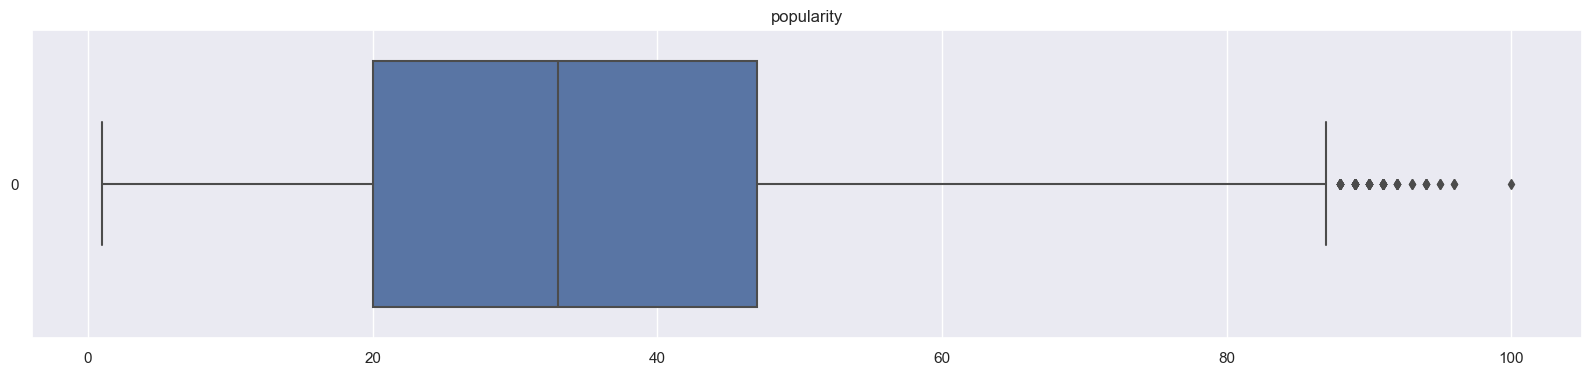

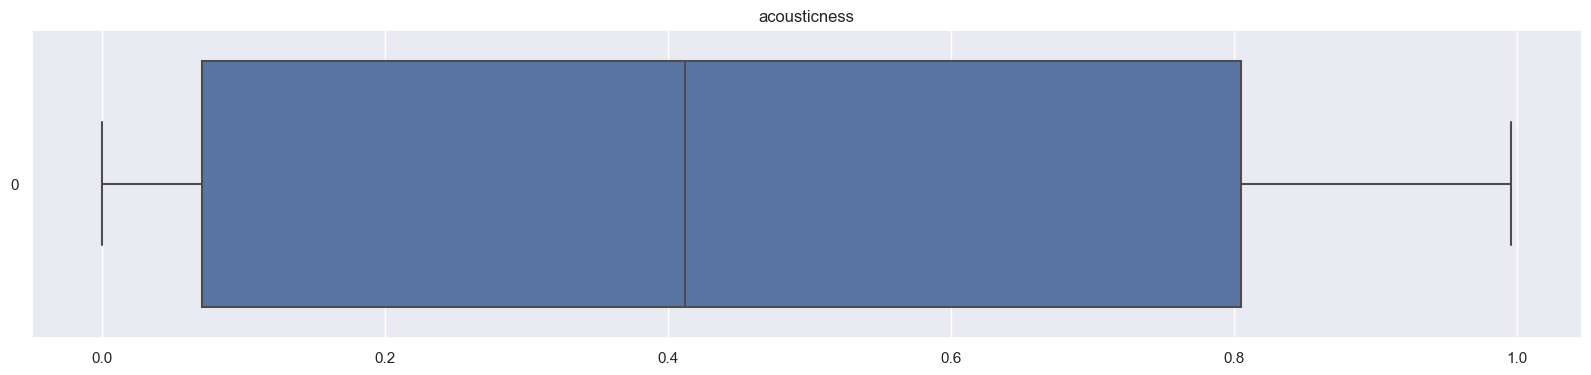

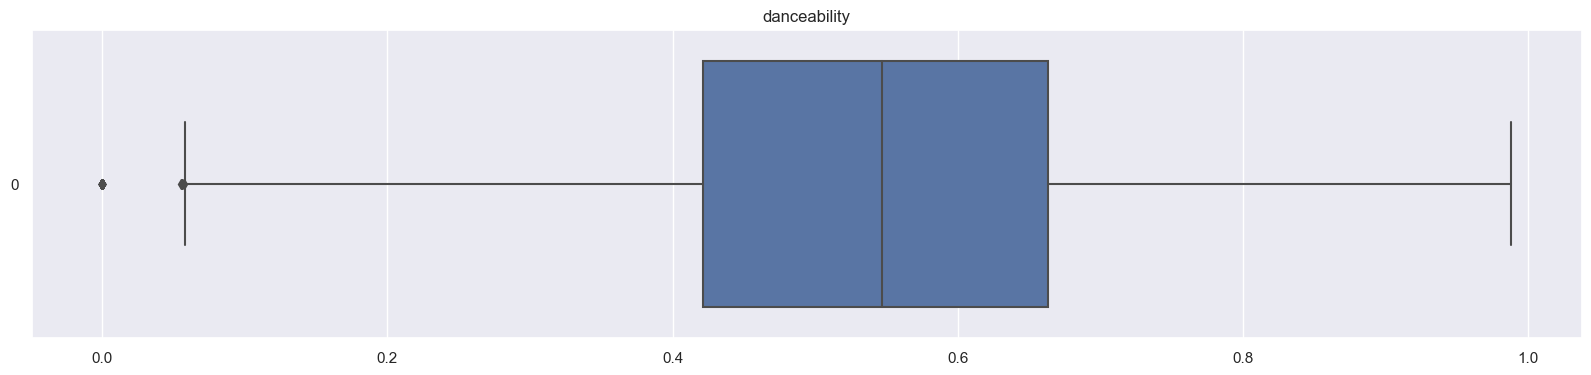

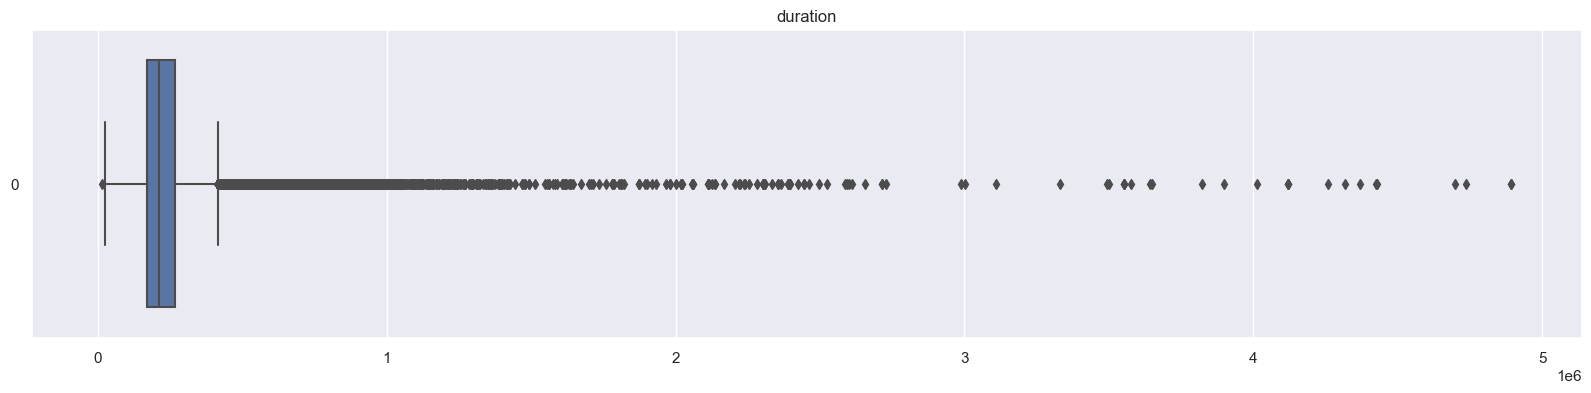

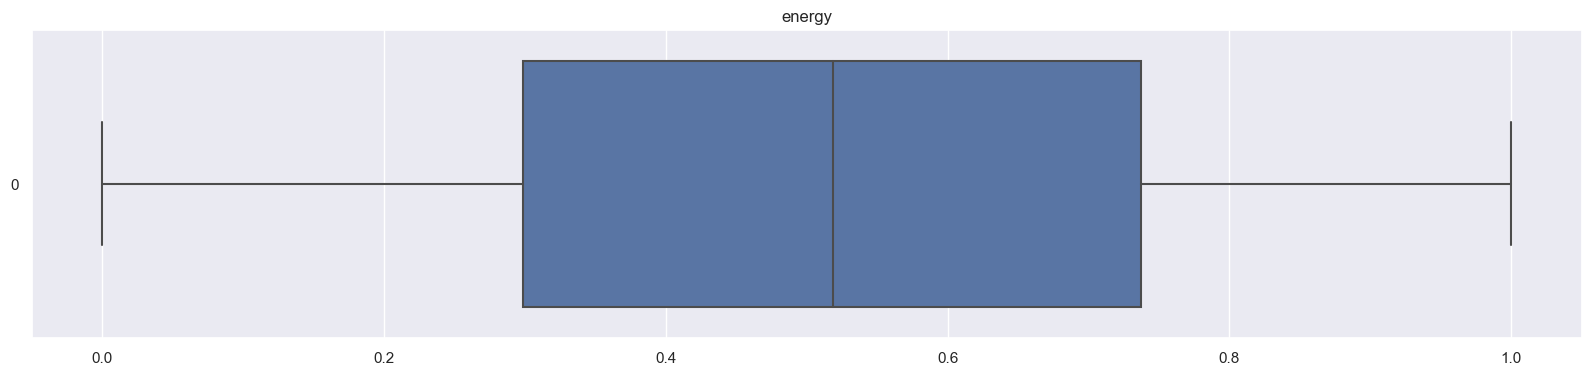

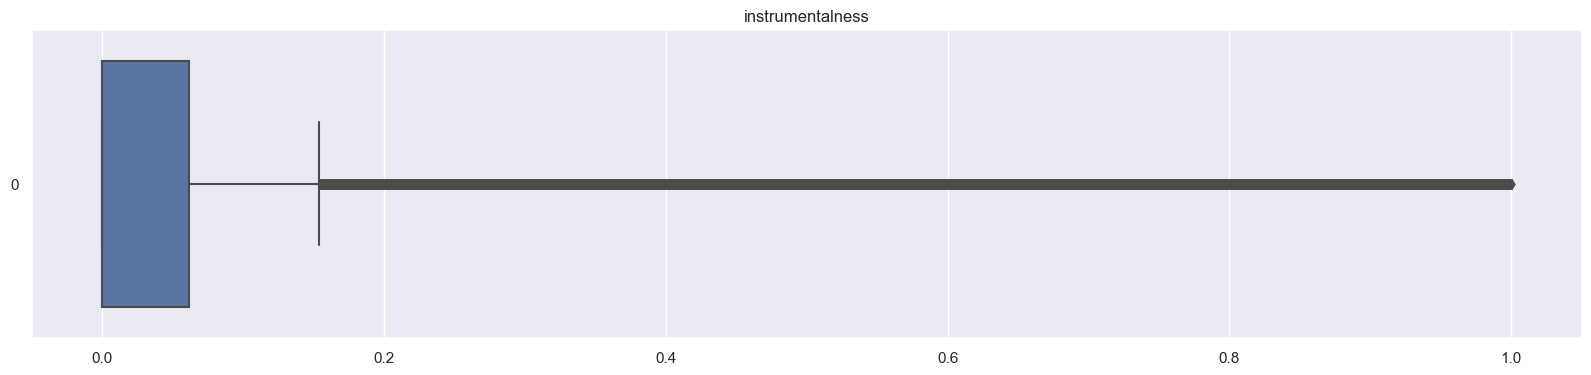

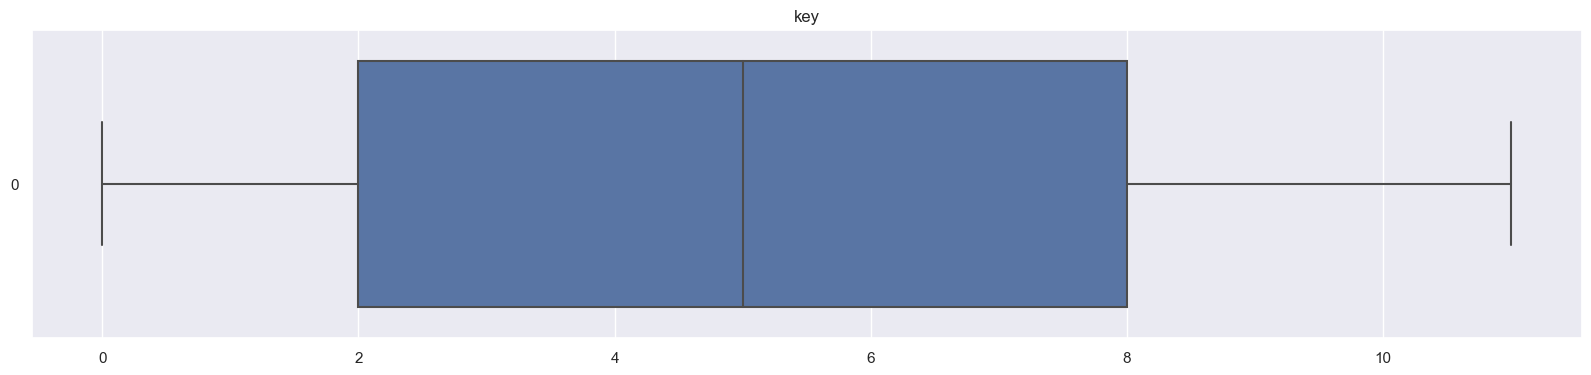

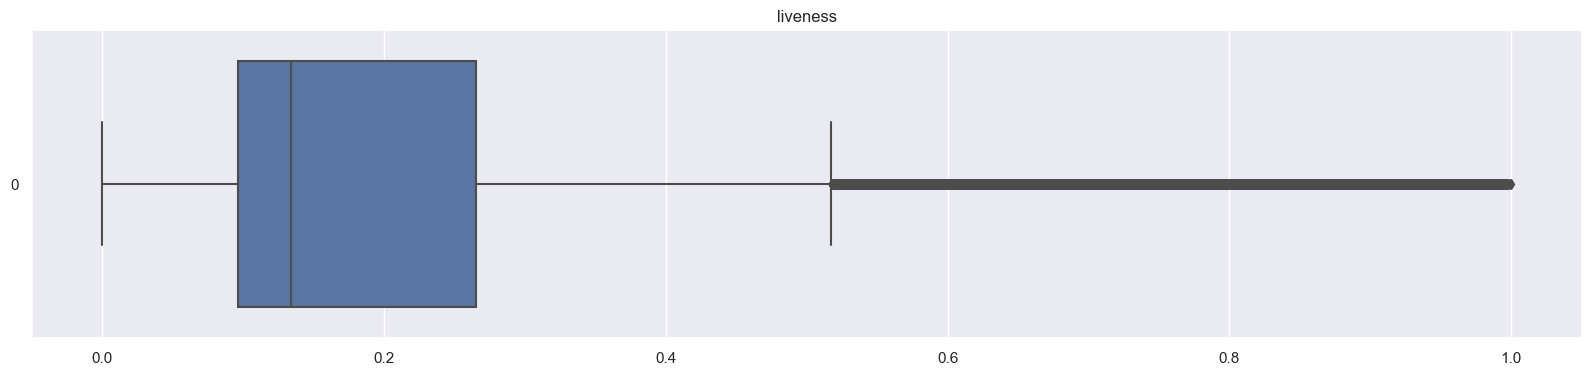

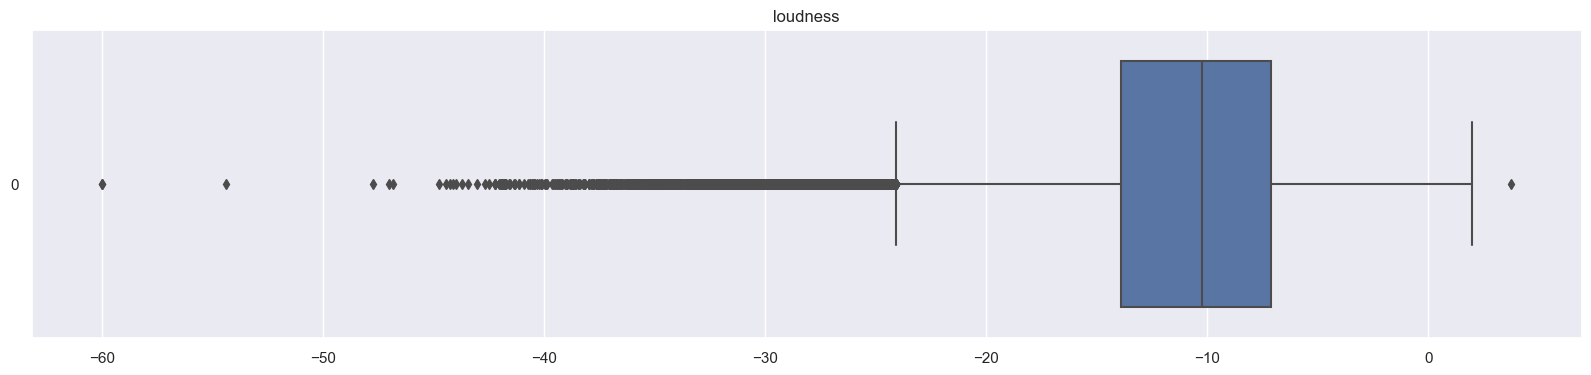

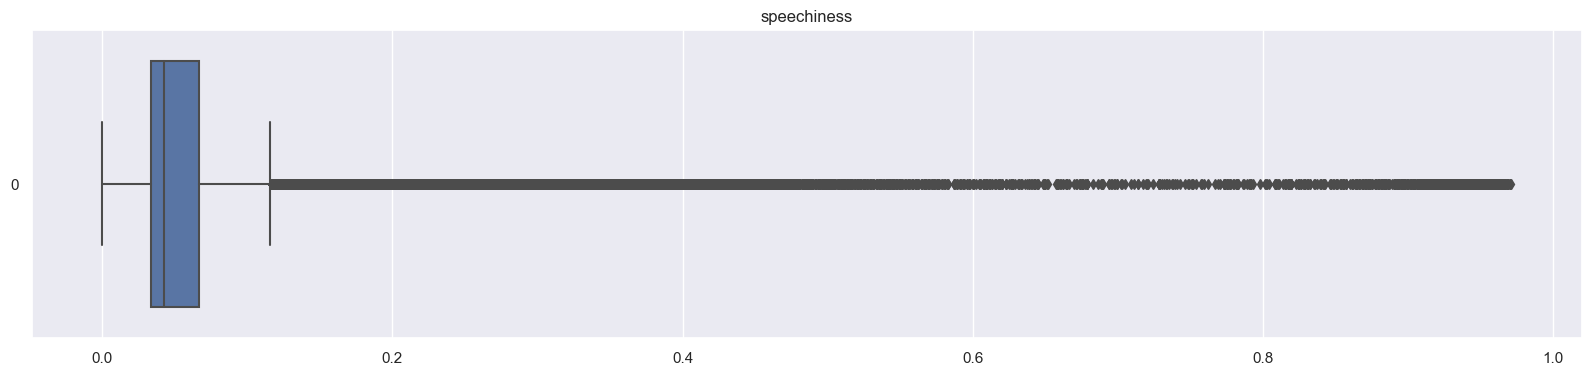

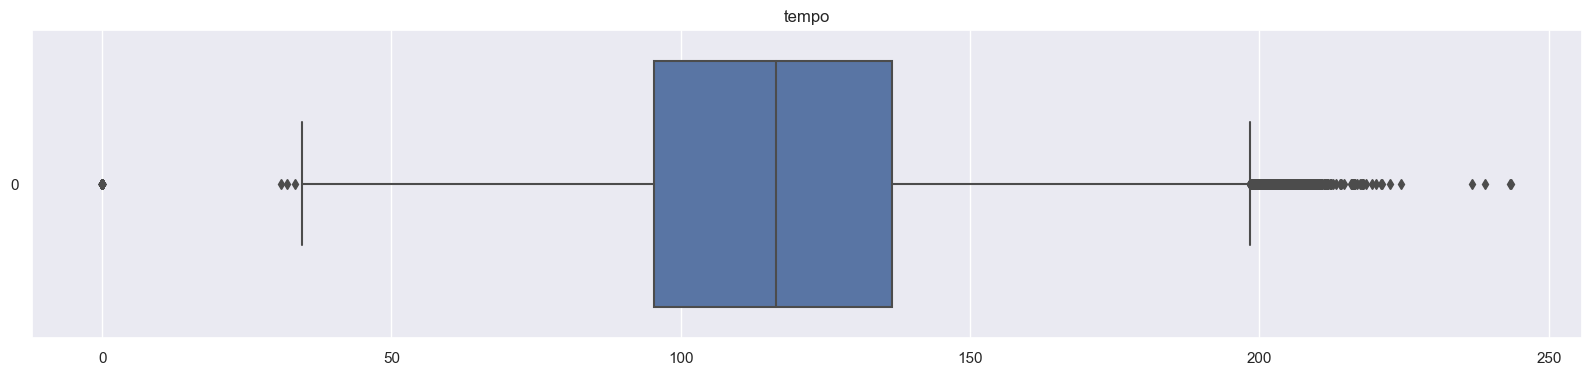

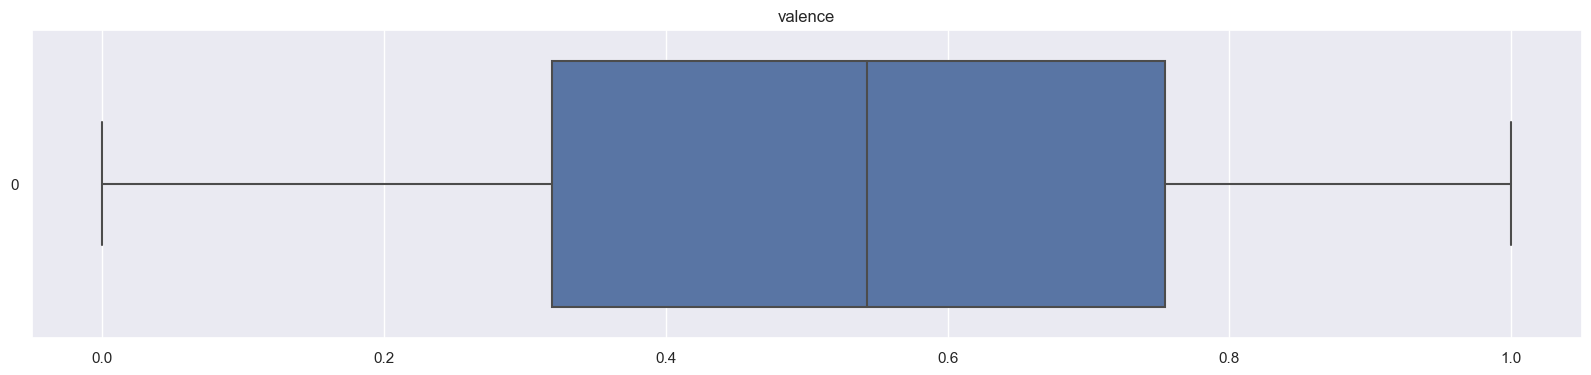

In [5]:
#don't need 'explicit' and 'mode'

f = plt.figure(figsize = (20,4))
sb.boxplot(data = popularity, orient = 'h').set(title = 'popularity')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = acousticness, orient = 'h').set(title = 'acousticness')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = danceability, orient = 'h').set(title = 'danceability')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = duration, orient = 'h').set(title = 'duration')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = energy, orient = 'h').set(title = 'energy')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = instrumentalness, orient = 'h').set(title = 'instrumentalness')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = key, orient = 'h').set(title = 'key')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = liveness, orient = 'h').set(title = 'liveness')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = loudness, orient = 'h').set(title = 'loudness')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = speechiness, orient = 'h').set(title = 'speechiness')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = tempo, orient = 'h').set(title = 'tempo')

f = plt.figure(figsize = (20,4))
sb.boxplot(data = valence, orient = 'h').set(title = 'valence')

### Count outliers
Don't need acousticness, energy, key, and valence

In [6]:
def countOutlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    for i in df:
        if i > (Q3 + 1.5 * IQR) or i < (Q1 - 1.5 * IQR):
            count+=1
    return count

print("popularity has", countOutlier(popularity), "outliers.")
print("danceability has", countOutlier(danceability), "outliers.")
print("duration has", countOutlier(duration), "outliers.")
print("instrumentalness has", countOutlier(instrumentalness), "outliers.")
print("liveness has", countOutlier(liveness), "outliers.")
print("loudness has", countOutlier(loudness), "outliers.")
print("speechiness has", countOutlier(speechiness), "outliers.")
print("tempo has", countOutlier(tempo), "outliers.")

popularity has 76 outliers.
danceability has 69 outliers.
duration has 6369 outliers.
instrumentalness has 28640 outliers.
liveness has 9818 outliers.
loudness has 3270 outliers.
speechiness has 17251 outliers.
tempo has 1285 outliers.


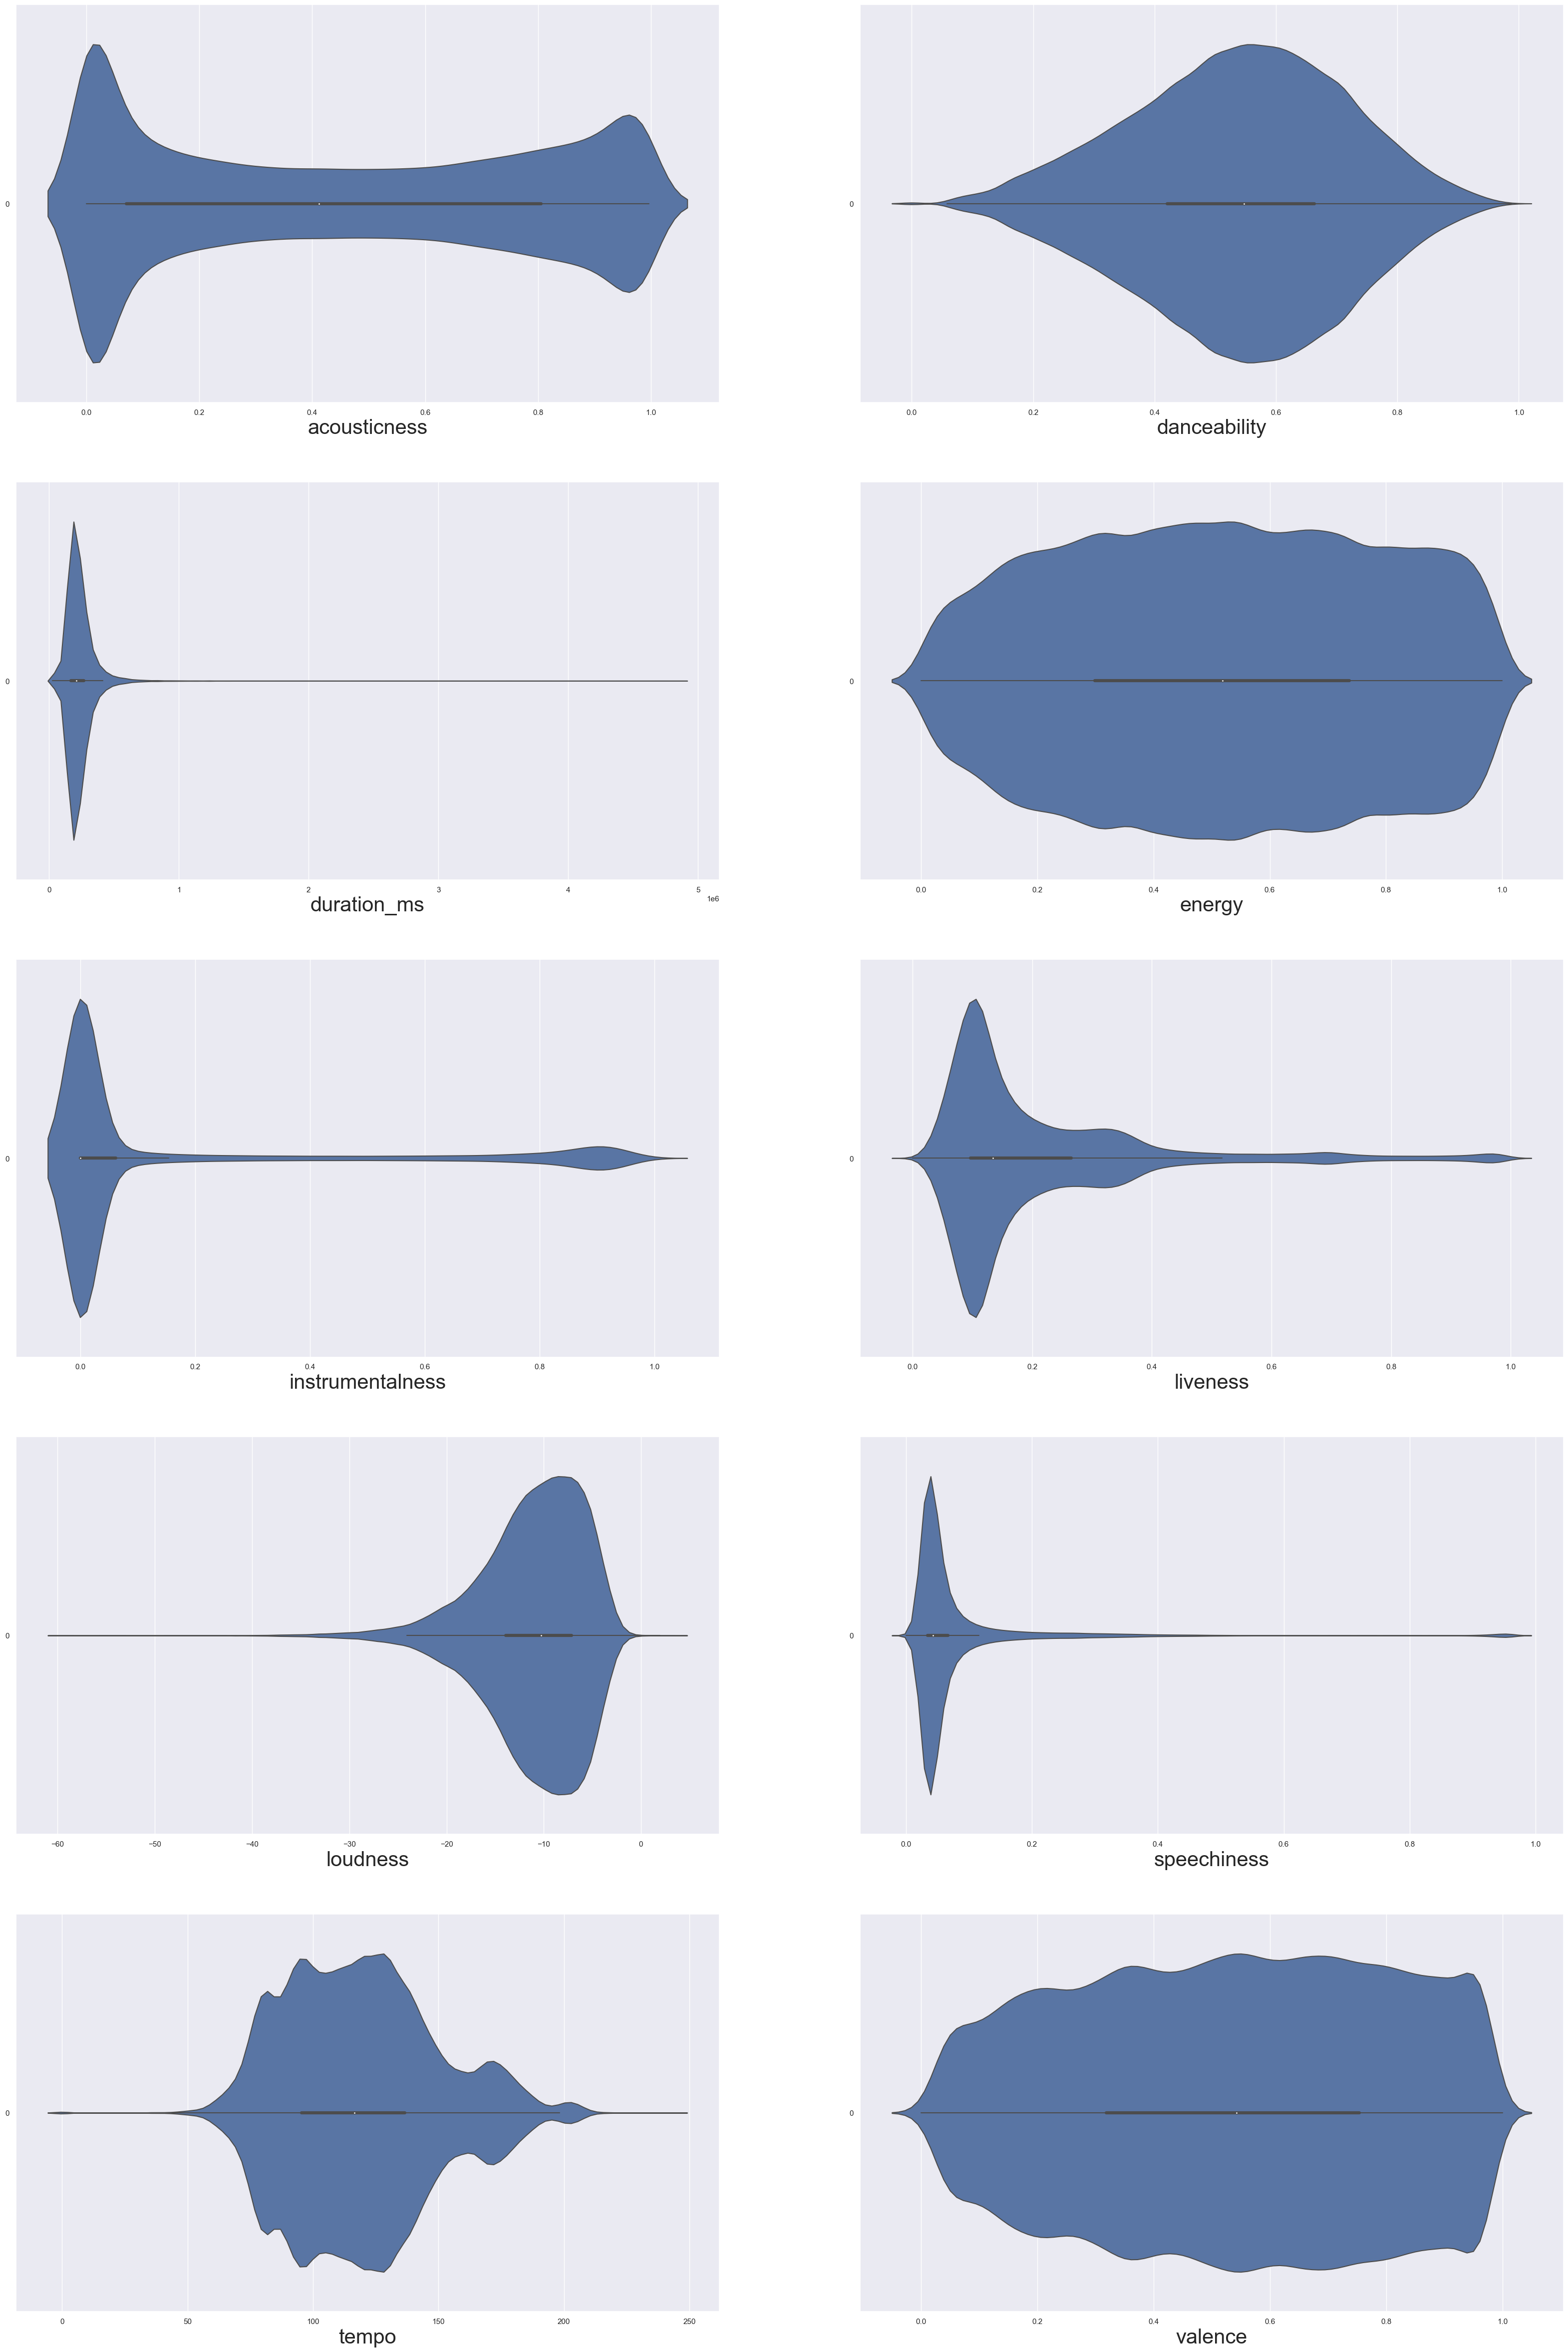

In [7]:
# distributions of the variables
f, axes = plt.subplots(5,2,figsize = (40, 60))
count = 0
row = 0
numericalData = [x for x in numericalSongData.columns if x != 'popularity'] #want to look at popularity by itself later
for var in numericalData:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = numericalSongData[var], orient = "h", ax = axes[row, col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize = 30)
    count+=1
    if count % 2 ==0:
        row+=1

In [8]:
numericalSongData["popularity"].describe()

count    133484.000000
mean         33.566892
std          18.992977
min           1.000000
25%          20.000000
50%          33.000000
75%          47.000000
max         100.000000
Name: popularity, dtype: float64

<Axes: >

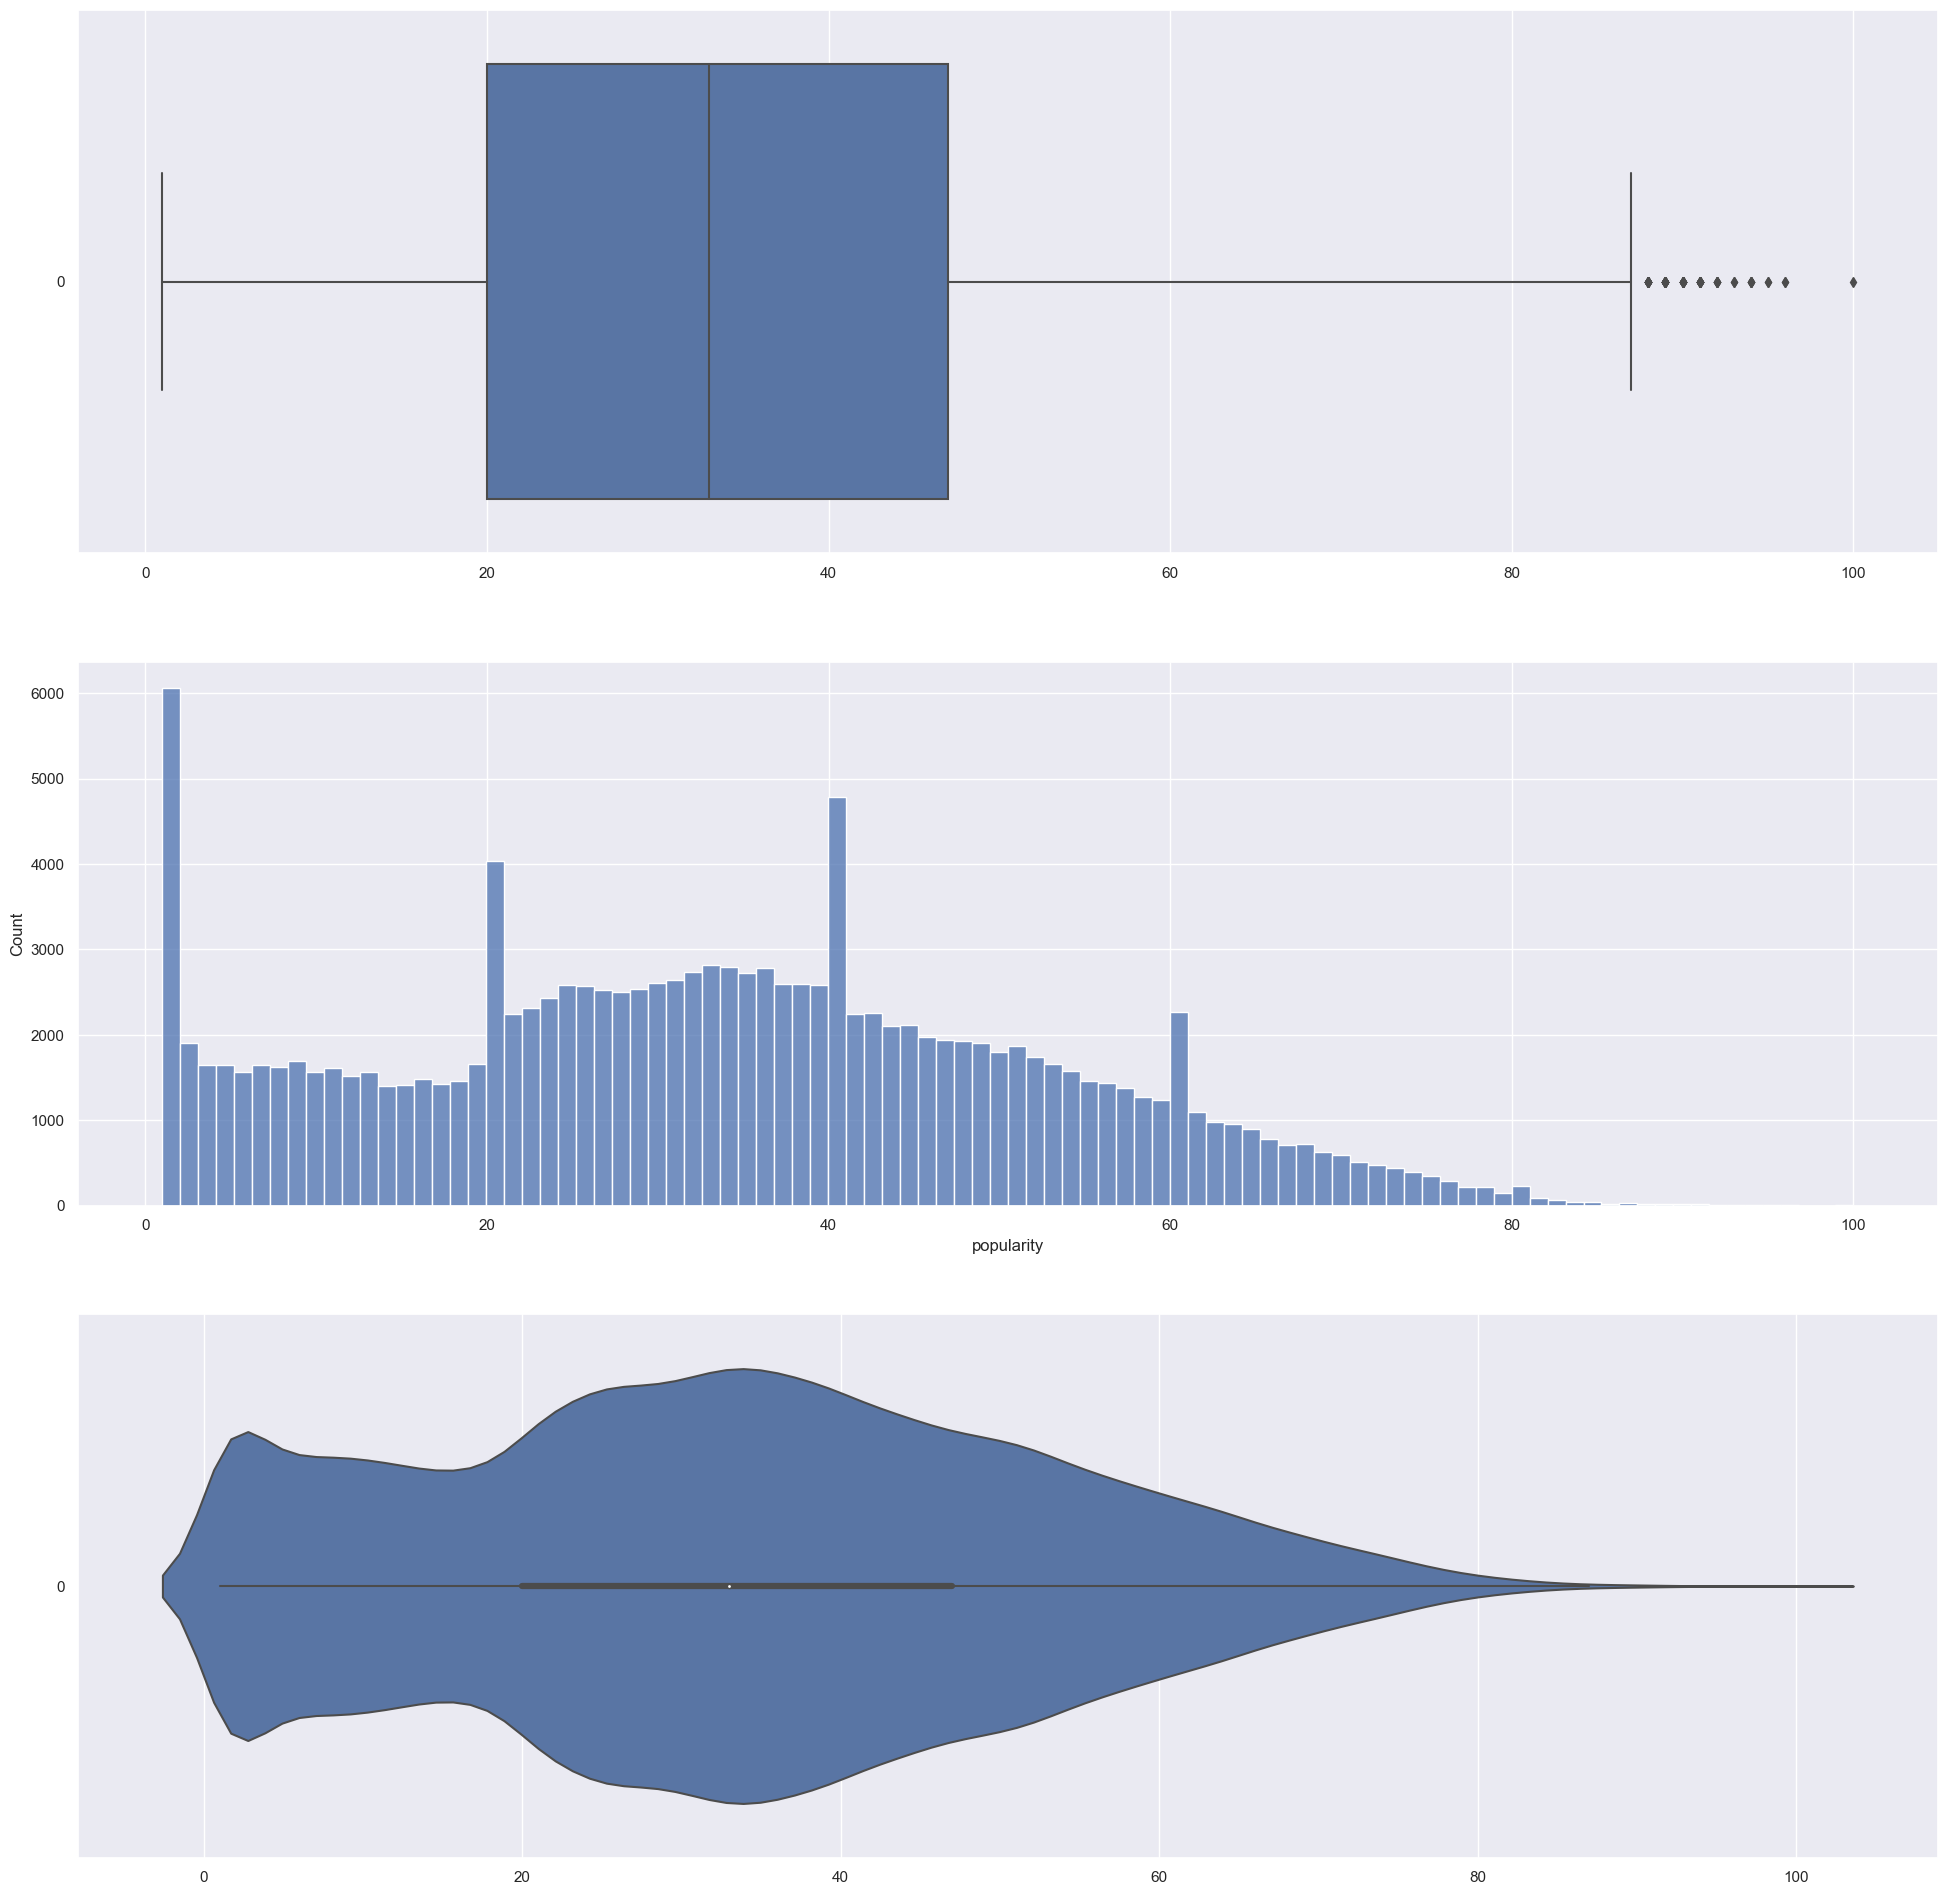

In [9]:
f, axes = plt.subplots(3, figsize = (24, 24))
sb.boxplot(data = numericalSongData["popularity"], orient = 'h', ax = axes[0])
sb.histplot(data = numericalSongData["popularity"], ax = axes[1])
sb.violinplot(data = numericalSongData["popularity"], orient = 'h', ax = axes[2])

We want to show if a song is popular if the popularity rating is 47 as 47 is the 75th percentile value. Anything that is popular should be rated popularity of 47 and above.

In [10]:
np.percentile(numericalSongData["popularity"], 75)

47.0

In [11]:
(numericalSongData["popularity"] >= 47).value_counts()

False    99019
True     34465
Name: popularity, dtype: int64

See the correlation between popularity and the other data

In [12]:
numericalSongData.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.367147,0.180941,0.042151,0.278501,-0.238290,-0.092912,0.321646,-0.054888,0.062135,0.038928
acousticness,-0.367147,1.000000,-0.236959,-0.082235,-0.755785,0.214581,-0.051528,-0.582726,-0.049537,-0.199763,-0.221386
danceability,0.180941,-0.236959,1.000000,-0.090785,0.200764,-0.240146,-0.119501,0.267039,0.189452,-0.042394,0.548893
duration_ms,0.042151,-0.082235,-0.090785,1.000000,0.029172,0.070614,0.052181,-0.012276,-0.032739,-0.018156,-0.158429
energy,0.278501,-0.755785,0.200764,0.029172,1.000000,-0.189110,0.161743,0.778739,0.038006,0.244692,0.373023
instrumentalness,-0.238290,0.214581,-0.240146,0.070614,-0.189110,1.000000,-0.028773,-0.369119,-0.094324,-0.066510,-0.223547
liveness,-0.092912,-0.051528,-0.119501,0.052181,0.161743,-0.028773,1.000000,0.076148,0.153506,0.018875,-0.014661
loudness,0.321646,-0.582726,0.267039,-0.012276,0.778739,-0.369119,0.076148,1.000000,-0.041788,0.197224,0.317085
speechiness,-0.054888,-0.049537,0.189452,-0.032739,0.038006,-0.094324,0.153506,-0.041788,1.000000,0.006207,0.023205
tempo,0.062135,-0.199763,-0.042394,-0.018156,0.244692,-0.066510,0.018875,0.197224,0.006207,1.000000,0.162922


<Axes: >

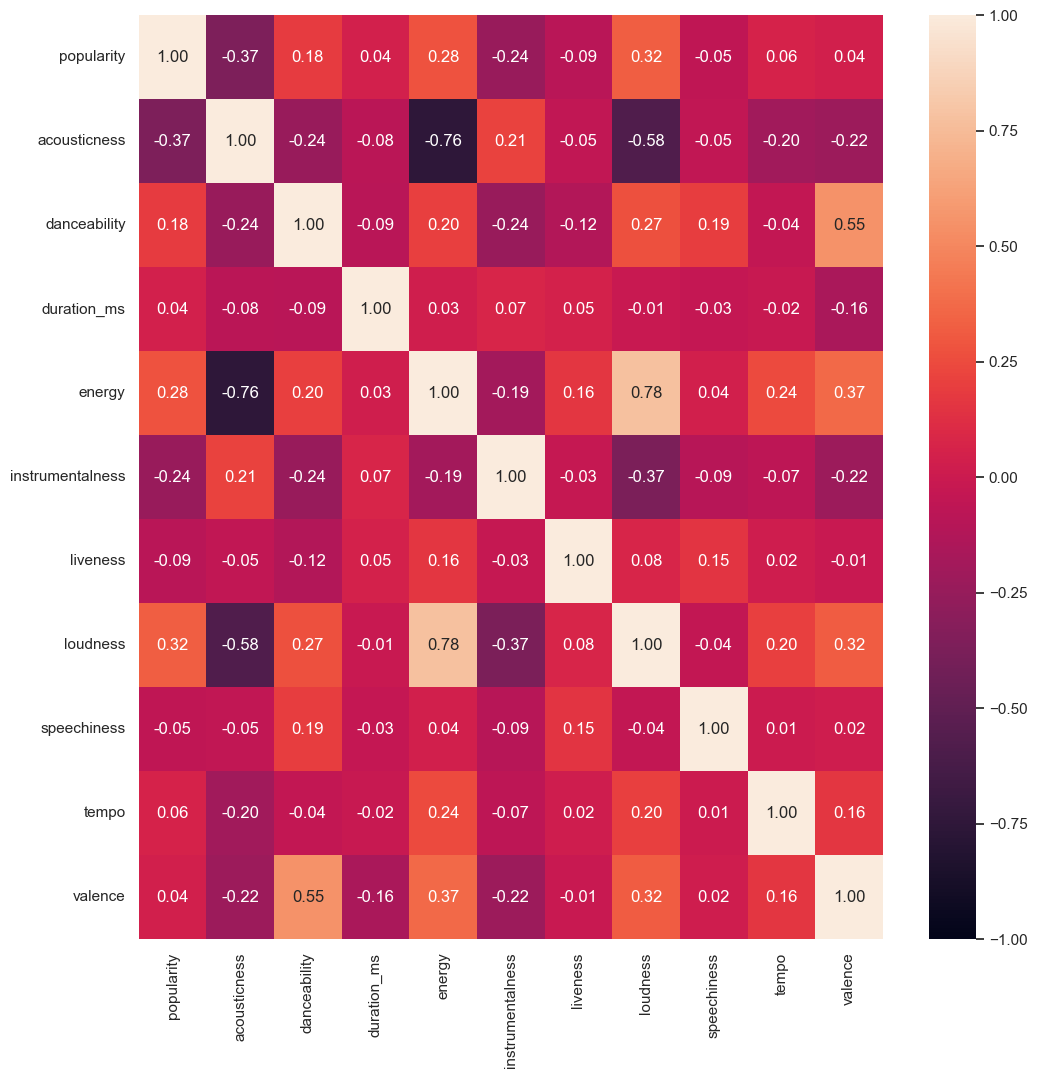

In [13]:
f = plt.figure(figsize = (12, 12))
sb.heatmap(numericalSongData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Looking at the heatmap, the correlation of popularity with the other attributes have a low correlation, the highest correlation being -0.37 which is "acousticness". This shows that they have a poor linear relationship with popularity. On the other hand, there might still be a non-linear relationship with the other properties.

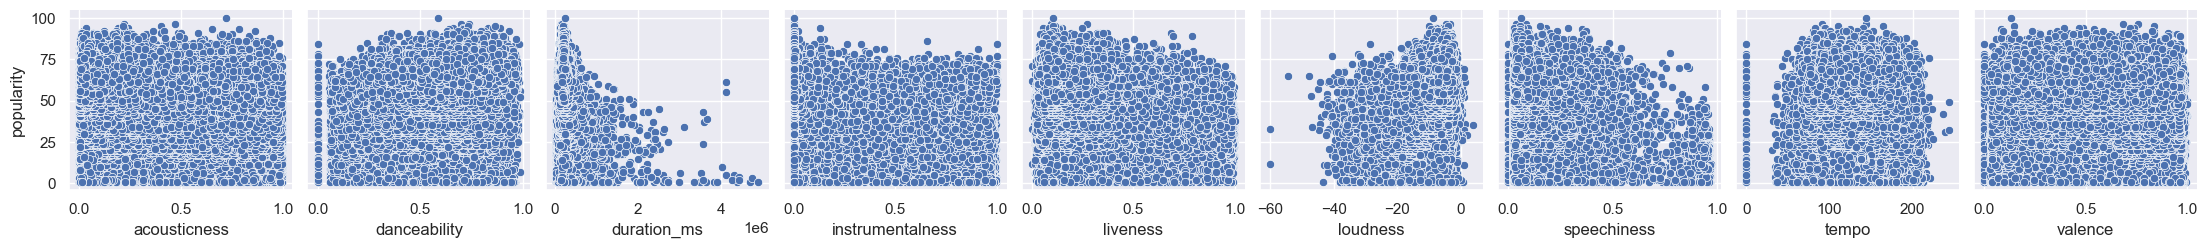

In [14]:
sb.pairplot(data = numericalSongData,
                    y_vars = ['popularity'],
                    x_vars = ['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'])

# Analysis of Categorial Variables

The categorial variabls would be artist, release date, explicit, key, and mode

In [15]:
categorialSongData = songData[["artists", "release_date", "explicit", "key", "mode", "popularity"]]
categorialSongData

,artists,release_date,explicit,key,mode,popularity
0,['Mamie Smith'],1920-01-01,0,5,0,12
1,"[""Screamin' Jay Hawkins""]",1920-05-01,0,5,0,7
2,['Mamie Smith'],1920-01-01,0,0,1,4
3,['Oscar Velazquez'],1920-01-01,0,2,1,17
4,['Mixe'],1920-01-10,1,10,0,2
...,...,...,...,...,...,...
133479,['Ashnikko'],2021-01-15,1,1,0,61
133480,"['Chinese Relaxation and Meditation', 'Asian T...",2021-01-16,0,7,1,2
133481,['Denis Pimenov'],2020-05-12,0,5,0,1
133482,"['Chinese Relaxation and Meditation', 'Asian T...",2021-01-16,0,7,1,2


In [16]:
# exact date would be too precise. Narrow down to year released.
categorialSongData['release_date'] = pd.DatetimeIndex(categorialSongData['release_date']).year
categorialSongData

,artists,release_date,explicit,key,mode,popularity
0,['Mamie Smith'],1920,0,5,0,12
1,"[""Screamin' Jay Hawkins""]",1920,0,5,0,7
2,['Mamie Smith'],1920,0,0,1,4
3,['Oscar Velazquez'],1920,0,2,1,17
4,['Mixe'],1920,1,10,0,2
...,...,...,...,...,...,...
133479,['Ashnikko'],2021,1,1,0,61
133480,"['Chinese Relaxation and Meditation', 'Asian T...",2021,0,7,1,2
133481,['Denis Pimenov'],2020,0,5,0,1
133482,"['Chinese Relaxation and Meditation', 'Asian T...",2021,0,7,1,2


REMINDER:
key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

explicit: 1 = has explicit language, 0 = does NOT have explicit language

mode: 1 = song is in major key, 0 = song is in minor key

In [17]:
categorialSongData["release_date"].value_counts()

2020    2830
1991    2121
2002    2048
1980    2040
1999    2039
        ... 
1931      64
1929      46
1924      44
1921      30
1922       2
Name: release_date, Length: 102, dtype: int64

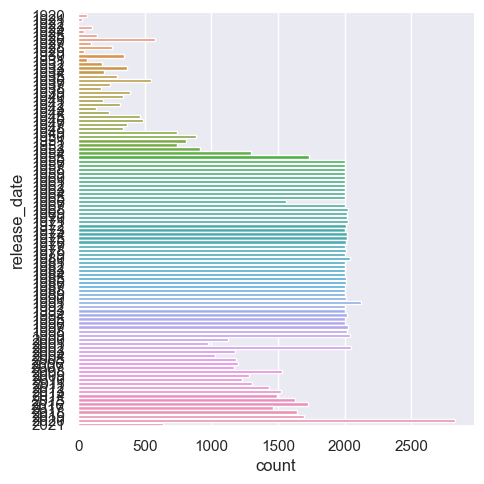

In [18]:
sb.catplot(y = "release_date", data = categorialSongData, kind = "count")

Year released is too broad. Narrow down to decade released

In [19]:
#convert date type to int
categorialSongData['release_date']=categorialSongData['release_date'].astype('int64')

categorialSongData.loc[(categorialSongData['release_date'] >= 1910) & (categorialSongData['release_date'] < 1920),'release_date'] = 1910
categorialSongData.loc[(categorialSongData['release_date'] >= 1920) & (categorialSongData['release_date'] < 1930),'release_date'] = 1920
categorialSongData.loc[(categorialSongData['release_date'] >= 1930) & (categorialSongData['release_date'] < 1940),'release_date'] = 1930
categorialSongData.loc[(categorialSongData['release_date'] >= 1940) & (categorialSongData['release_date'] < 1950),'release_date'] = 1940
categorialSongData.loc[(categorialSongData['release_date'] >= 1950) & (categorialSongData['release_date'] < 1960),'release_date'] = 1950
categorialSongData.loc[(categorialSongData['release_date'] >= 1960) & (categorialSongData['release_date'] < 1970),'release_date'] = 1960
categorialSongData.loc[(categorialSongData['release_date'] >= 1970) & (categorialSongData['release_date'] < 1980),'release_date'] = 1970
categorialSongData.loc[(categorialSongData['release_date'] >= 1980) & (categorialSongData['release_date'] < 1990),'release_date'] = 1980
categorialSongData.loc[(categorialSongData['release_date'] >= 1990) & (categorialSongData['release_date'] < 2000),'release_date'] = 1990
categorialSongData.loc[(categorialSongData['release_date'] >= 2000) & (categorialSongData['release_date'] < 2010),'release_date'] = 2000
categorialSongData.loc[(categorialSongData['release_date'] >= 2010) & (categorialSongData['release_date'] < 2020),'release_date'] = 2010
categorialSongData.loc[(categorialSongData['release_date'] >= 2020) & (categorialSongData['release_date'] < 2030),'release_date'] = 2020

categorialSongData

,artists,release_date,explicit,key,mode,popularity
0,['Mamie Smith'],1920,0,5,0,12
1,"[""Screamin' Jay Hawkins""]",1920,0,5,0,7
2,['Mamie Smith'],1920,0,0,1,4
3,['Oscar Velazquez'],1920,0,2,1,17
4,['Mixe'],1920,1,10,0,2
...,...,...,...,...,...,...
133479,['Ashnikko'],2020,1,1,0,61
133480,"['Chinese Relaxation and Meditation', 'Asian T...",2020,0,7,1,2
133481,['Denis Pimenov'],2020,0,5,0,1
133482,"['Chinese Relaxation and Meditation', 'Asian T...",2020,0,7,1,2


In [20]:
categorialSongData["release_date"].value_counts()

1990    20246
1970    20116
1980    20071
1960    19610
2010    15119
1950    14385
2000    12718
1940     3597
2020     3470
1930     2793
1920     1359
Name: release_date, dtype: int64

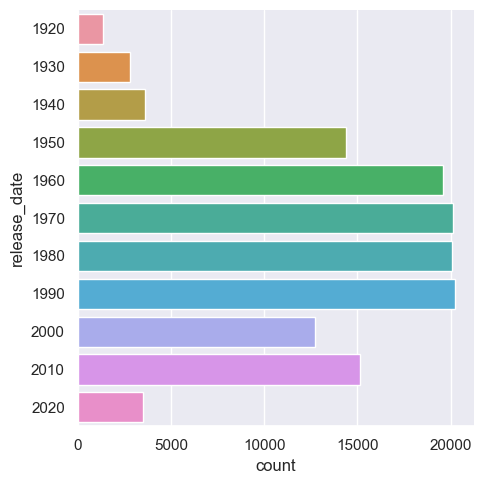

In [37]:
sb.catplot(y = "release_date", data = categorialSongData, kind = "count")

In [22]:
categorialSongData["artists"].value_counts()

['Frank Sinatra']                                                                          621
['Elvis Presley']                                                                          494
['Bob Dylan']                                                                              459
['Johnny Cash']                                                                            456
['Fleetwood Mac']                                                                          450
                                                                                          ... 
['Mac Miller', 'Kendrick Lamar']                                                             1
['Kid Cudi', 'WILLOW']                                                                       1
['Andreas Weise']                                                                            1
['Brown Noise for Babies', 'White Noise for Deeper Sleep', 'Appliances for Meditation']      1
['Sfera Ebbasta', 'J Balvin']                     

Too many different artists. We will not use this metric.

In [23]:
categorialSongData["explicit"].value_counts()

0    124880
1      8604
Name: explicit, dtype: int64

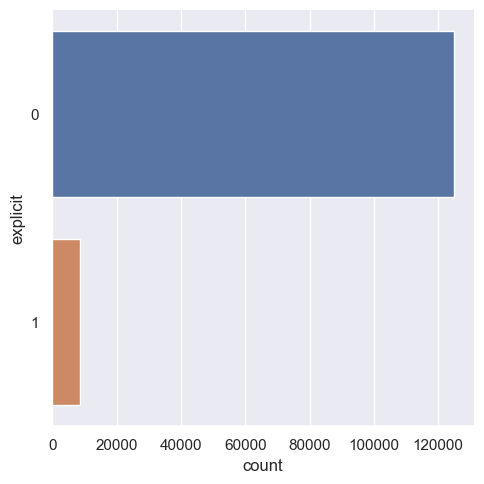

In [24]:
sb.catplot(y = "explicit", data = categorialSongData, kind = "count")

In [25]:
categorialSongData["key"].value_counts()

0     17311
7     16786
2     14887
9     14381
5     12886
4     10379
1      9588
10     9332
8      8113
11     8029
6      6576
3      5216
Name: key, dtype: int64

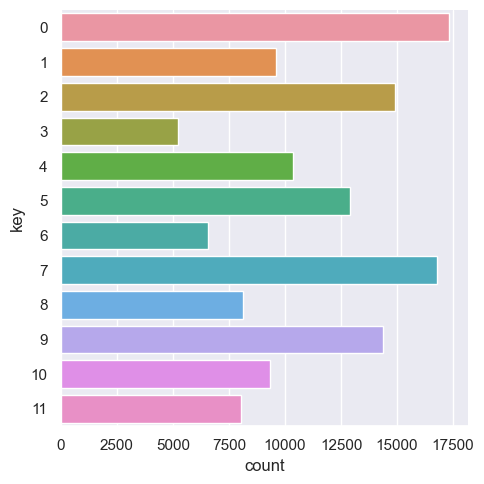

In [26]:
sb.catplot(y = "key", data = categorialSongData, kind = "count")

In [27]:
categorialSongData

,artists,release_date,explicit,key,mode,popularity
0,['Mamie Smith'],1920,0,5,0,12
1,"[""Screamin' Jay Hawkins""]",1920,0,5,0,7
2,['Mamie Smith'],1920,0,0,1,4
3,['Oscar Velazquez'],1920,0,2,1,17
4,['Mixe'],1920,1,10,0,2
...,...,...,...,...,...,...
133479,['Ashnikko'],2020,1,1,0,61
133480,"['Chinese Relaxation and Meditation', 'Asian T...",2020,0,7,1,2
133481,['Denis Pimenov'],2020,0,5,0,1
133482,"['Chinese Relaxation and Meditation', 'Asian T...",2020,0,7,1,2


Now check the categorial variables against the popularity of the songs

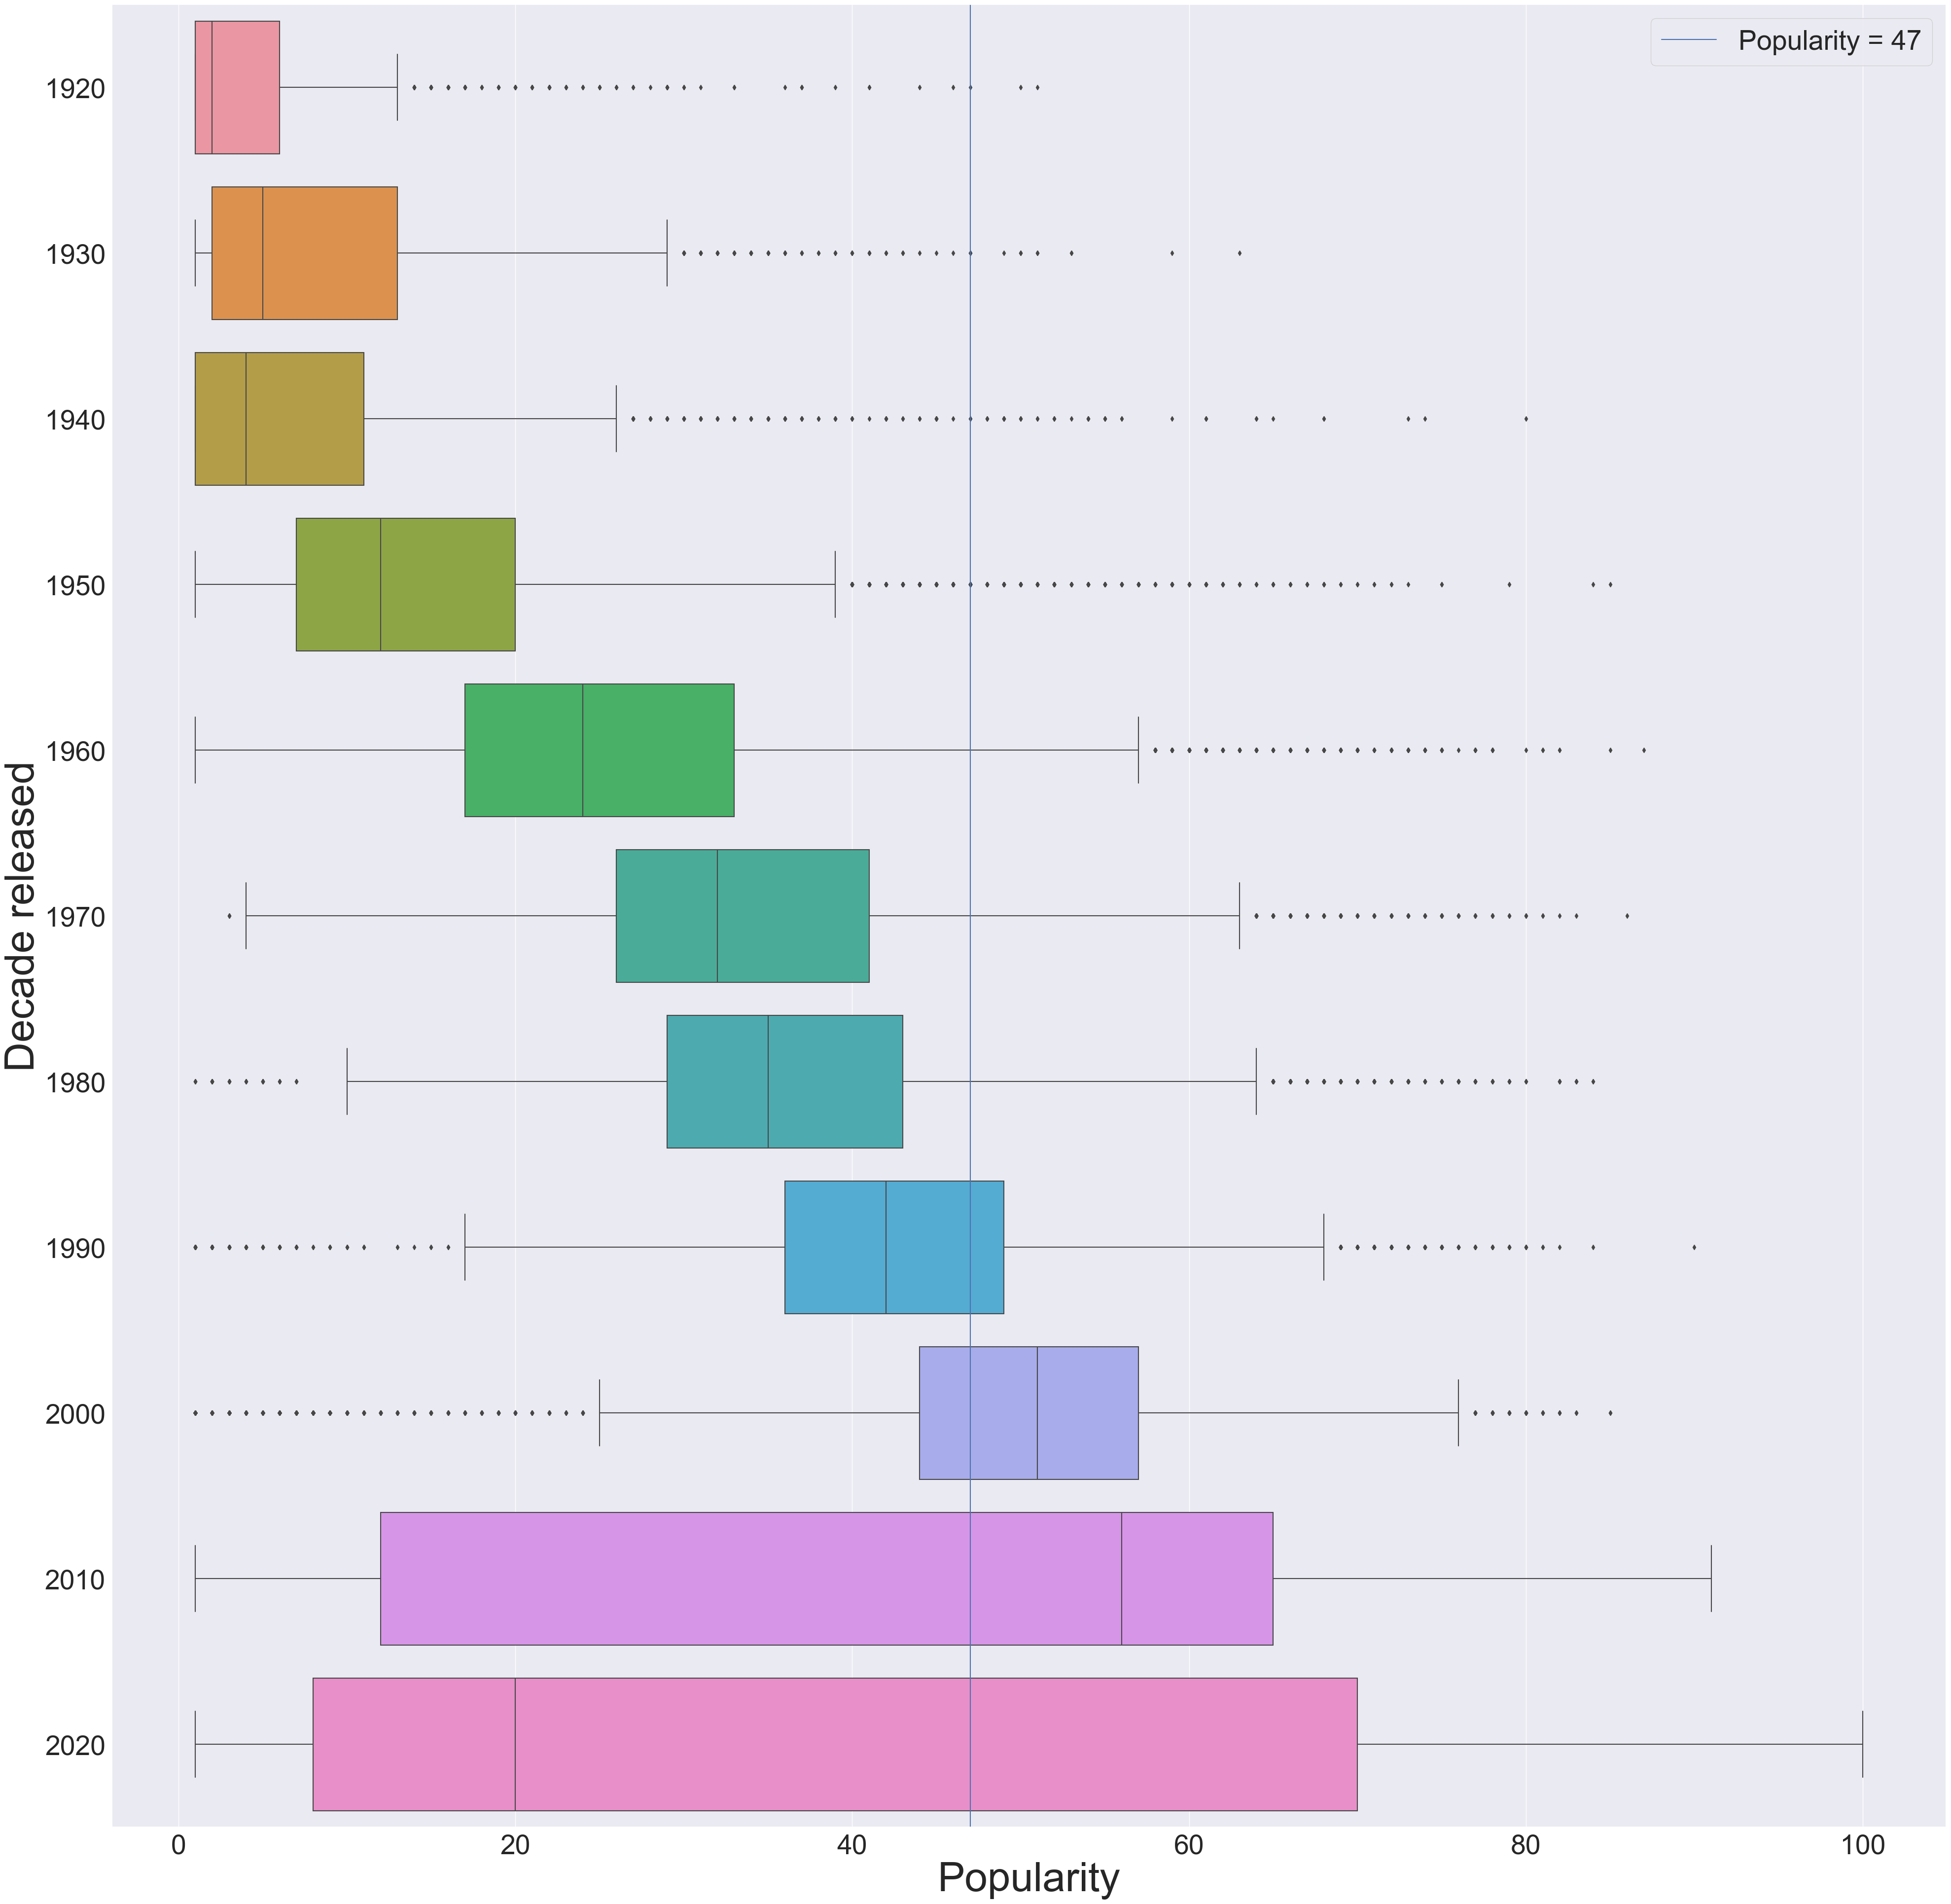

In [38]:
f, ax = plt.subplots(figsize = (48, 48))
sb.boxplot(x = "popularity", y = "release_date", data = categorialSongData, orient = 'h')
ax.tick_params(axis = 'y', labelsize = 40)
ax.tick_params(axis = 'x', labelsize = 40)
ax.set_xlabel("Popularity", fontsize = 60)
ax.set_ylabel("Decade released", fontsize = 60)
plt.axvline(47, label = "Popularity = 47") #47 = popular = 75th percentile popularity score
plt.legend(fontsize = 40)
plt.show()

Looking at the graphs, it shows that songs released from 1990 onwards are more popular than the songs released before 1990.

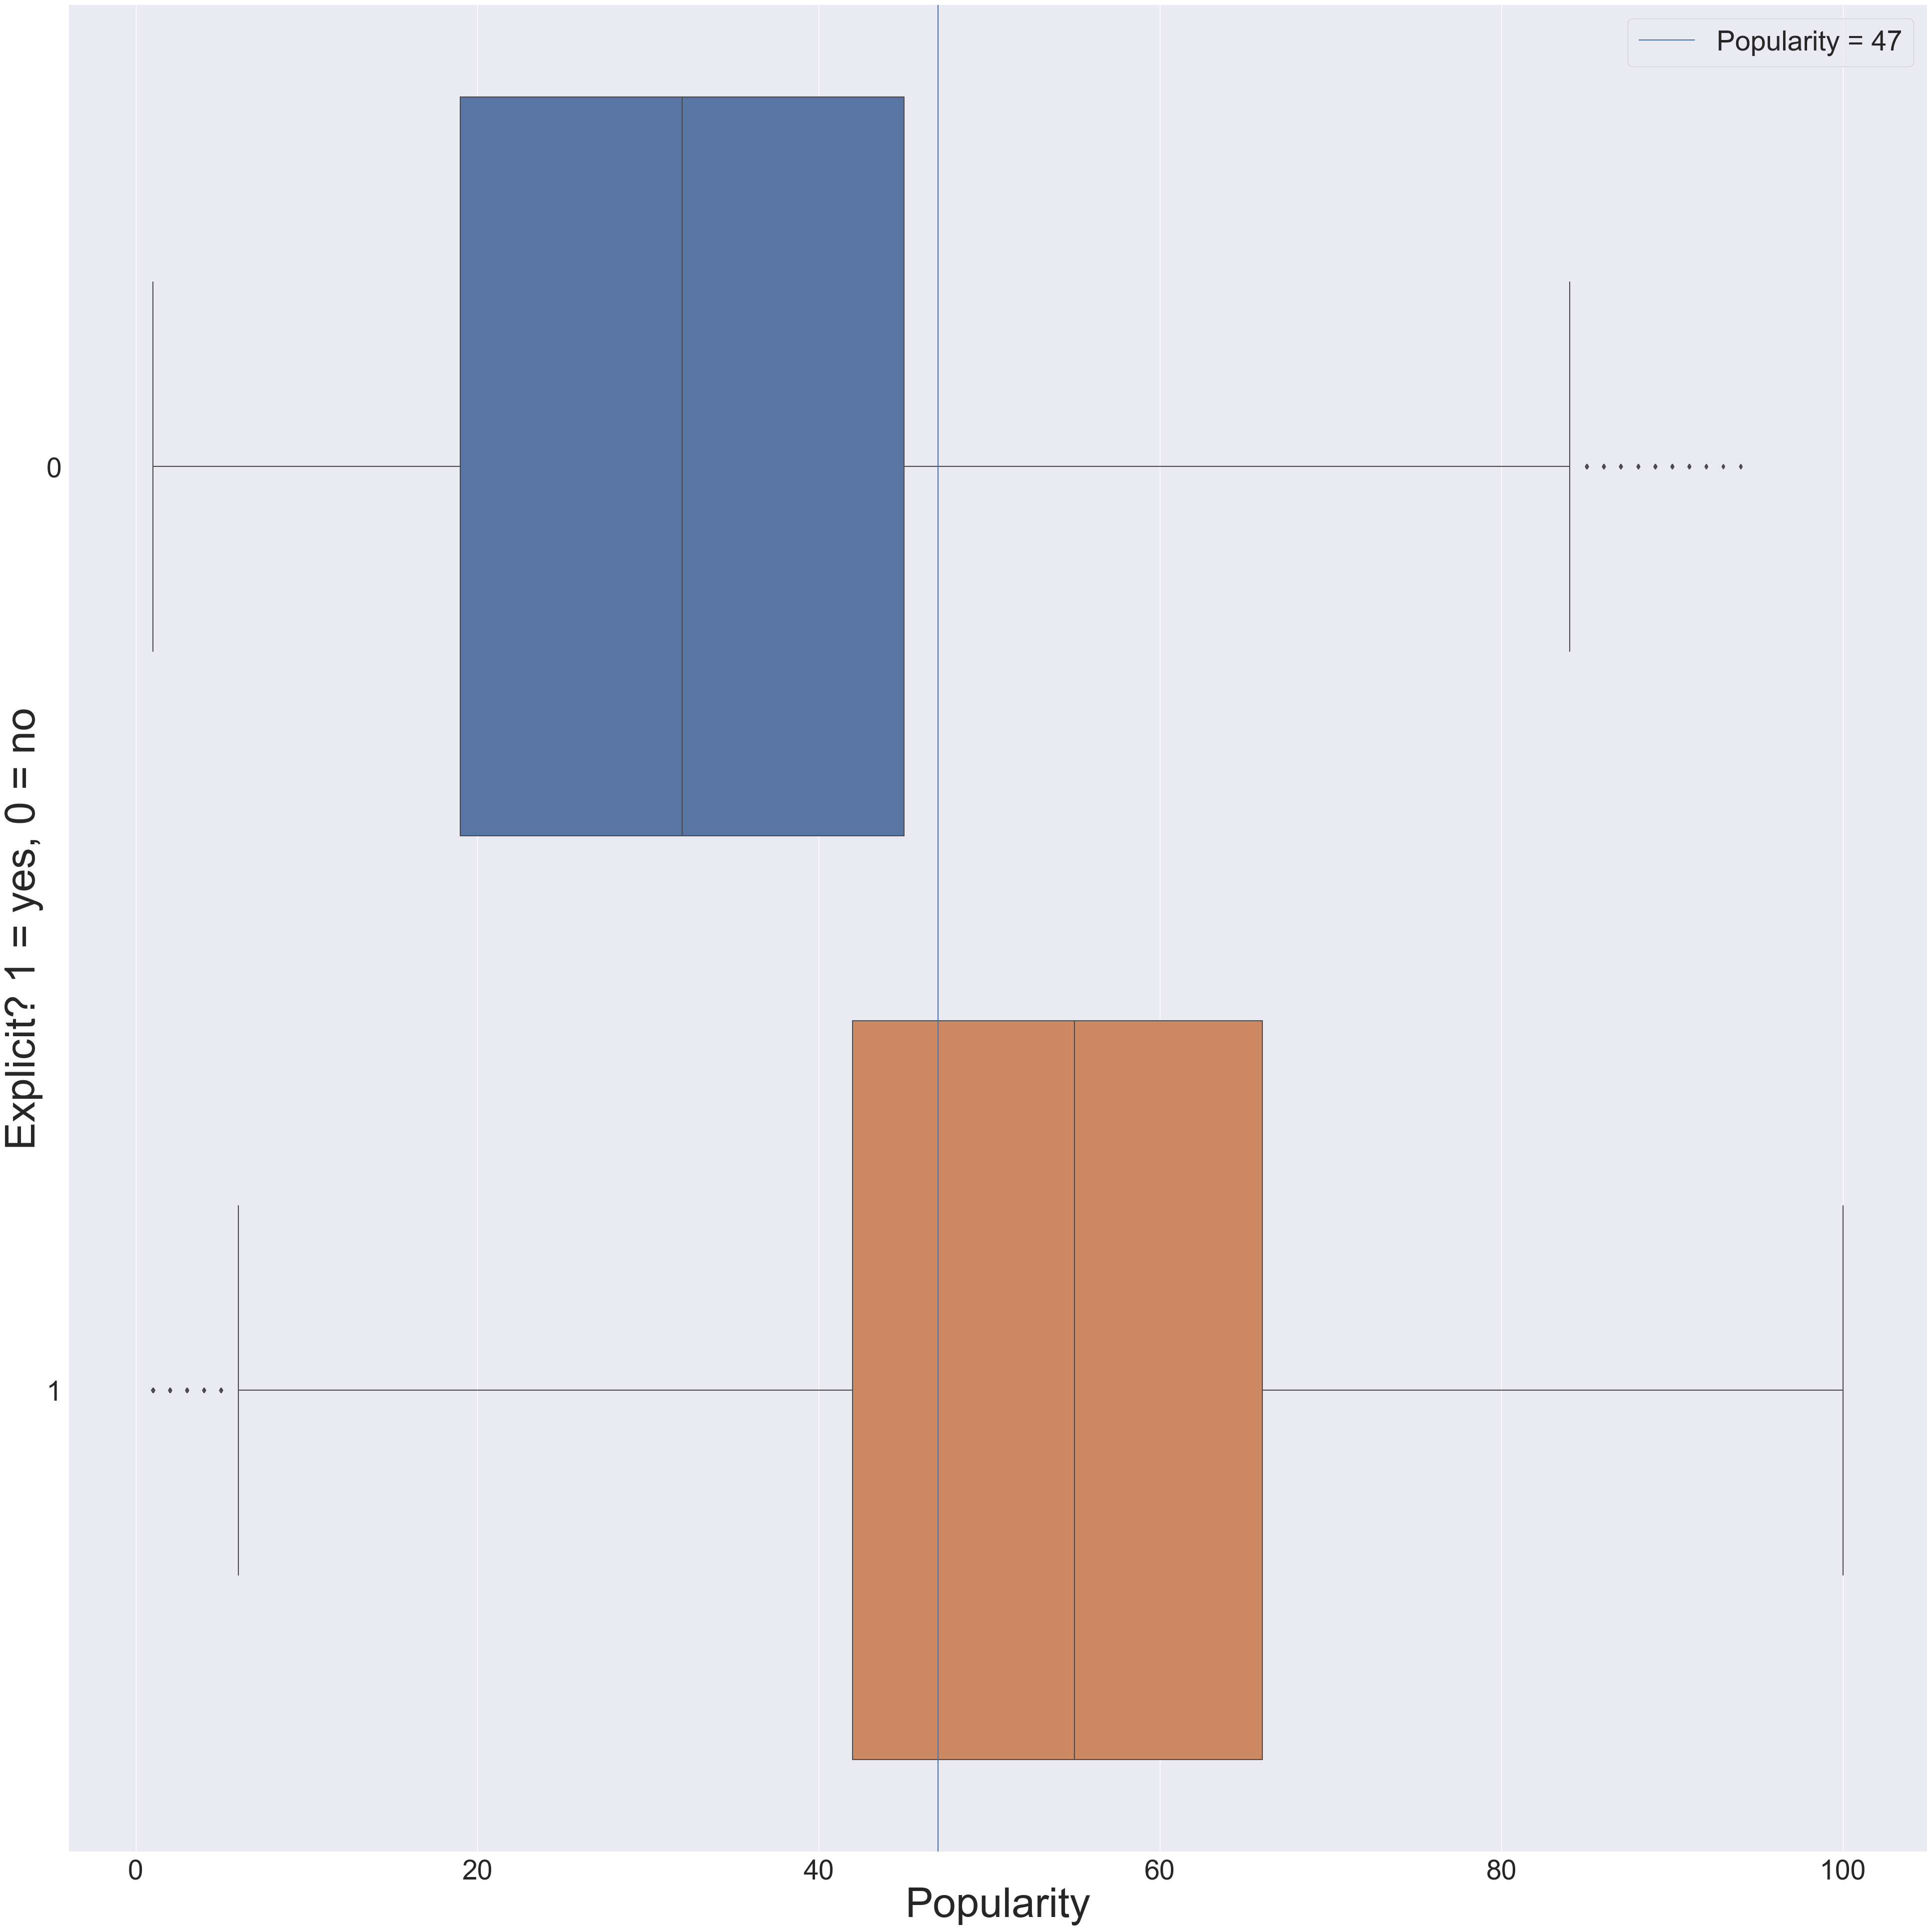

In [39]:
f, ax = plt.subplots(figsize = (48, 48))
sb.boxplot(x = "popularity", y = "explicit", data = categorialSongData, orient = 'h')
ax.tick_params(axis = 'y', labelsize = 40)
ax.tick_params(axis = 'x', labelsize = 40)
ax.set_xlabel("Popularity", fontsize = 60)
ax.set_ylabel("Explicit? 1 = yes, 0 = no", fontsize = 60)
plt.axvline(47, label = "Popularity = 47") #47 = popular = 75th percentile popularity score
plt.legend(fontsize = 40)
plt.show()

As shown songs that are explicit are more popular

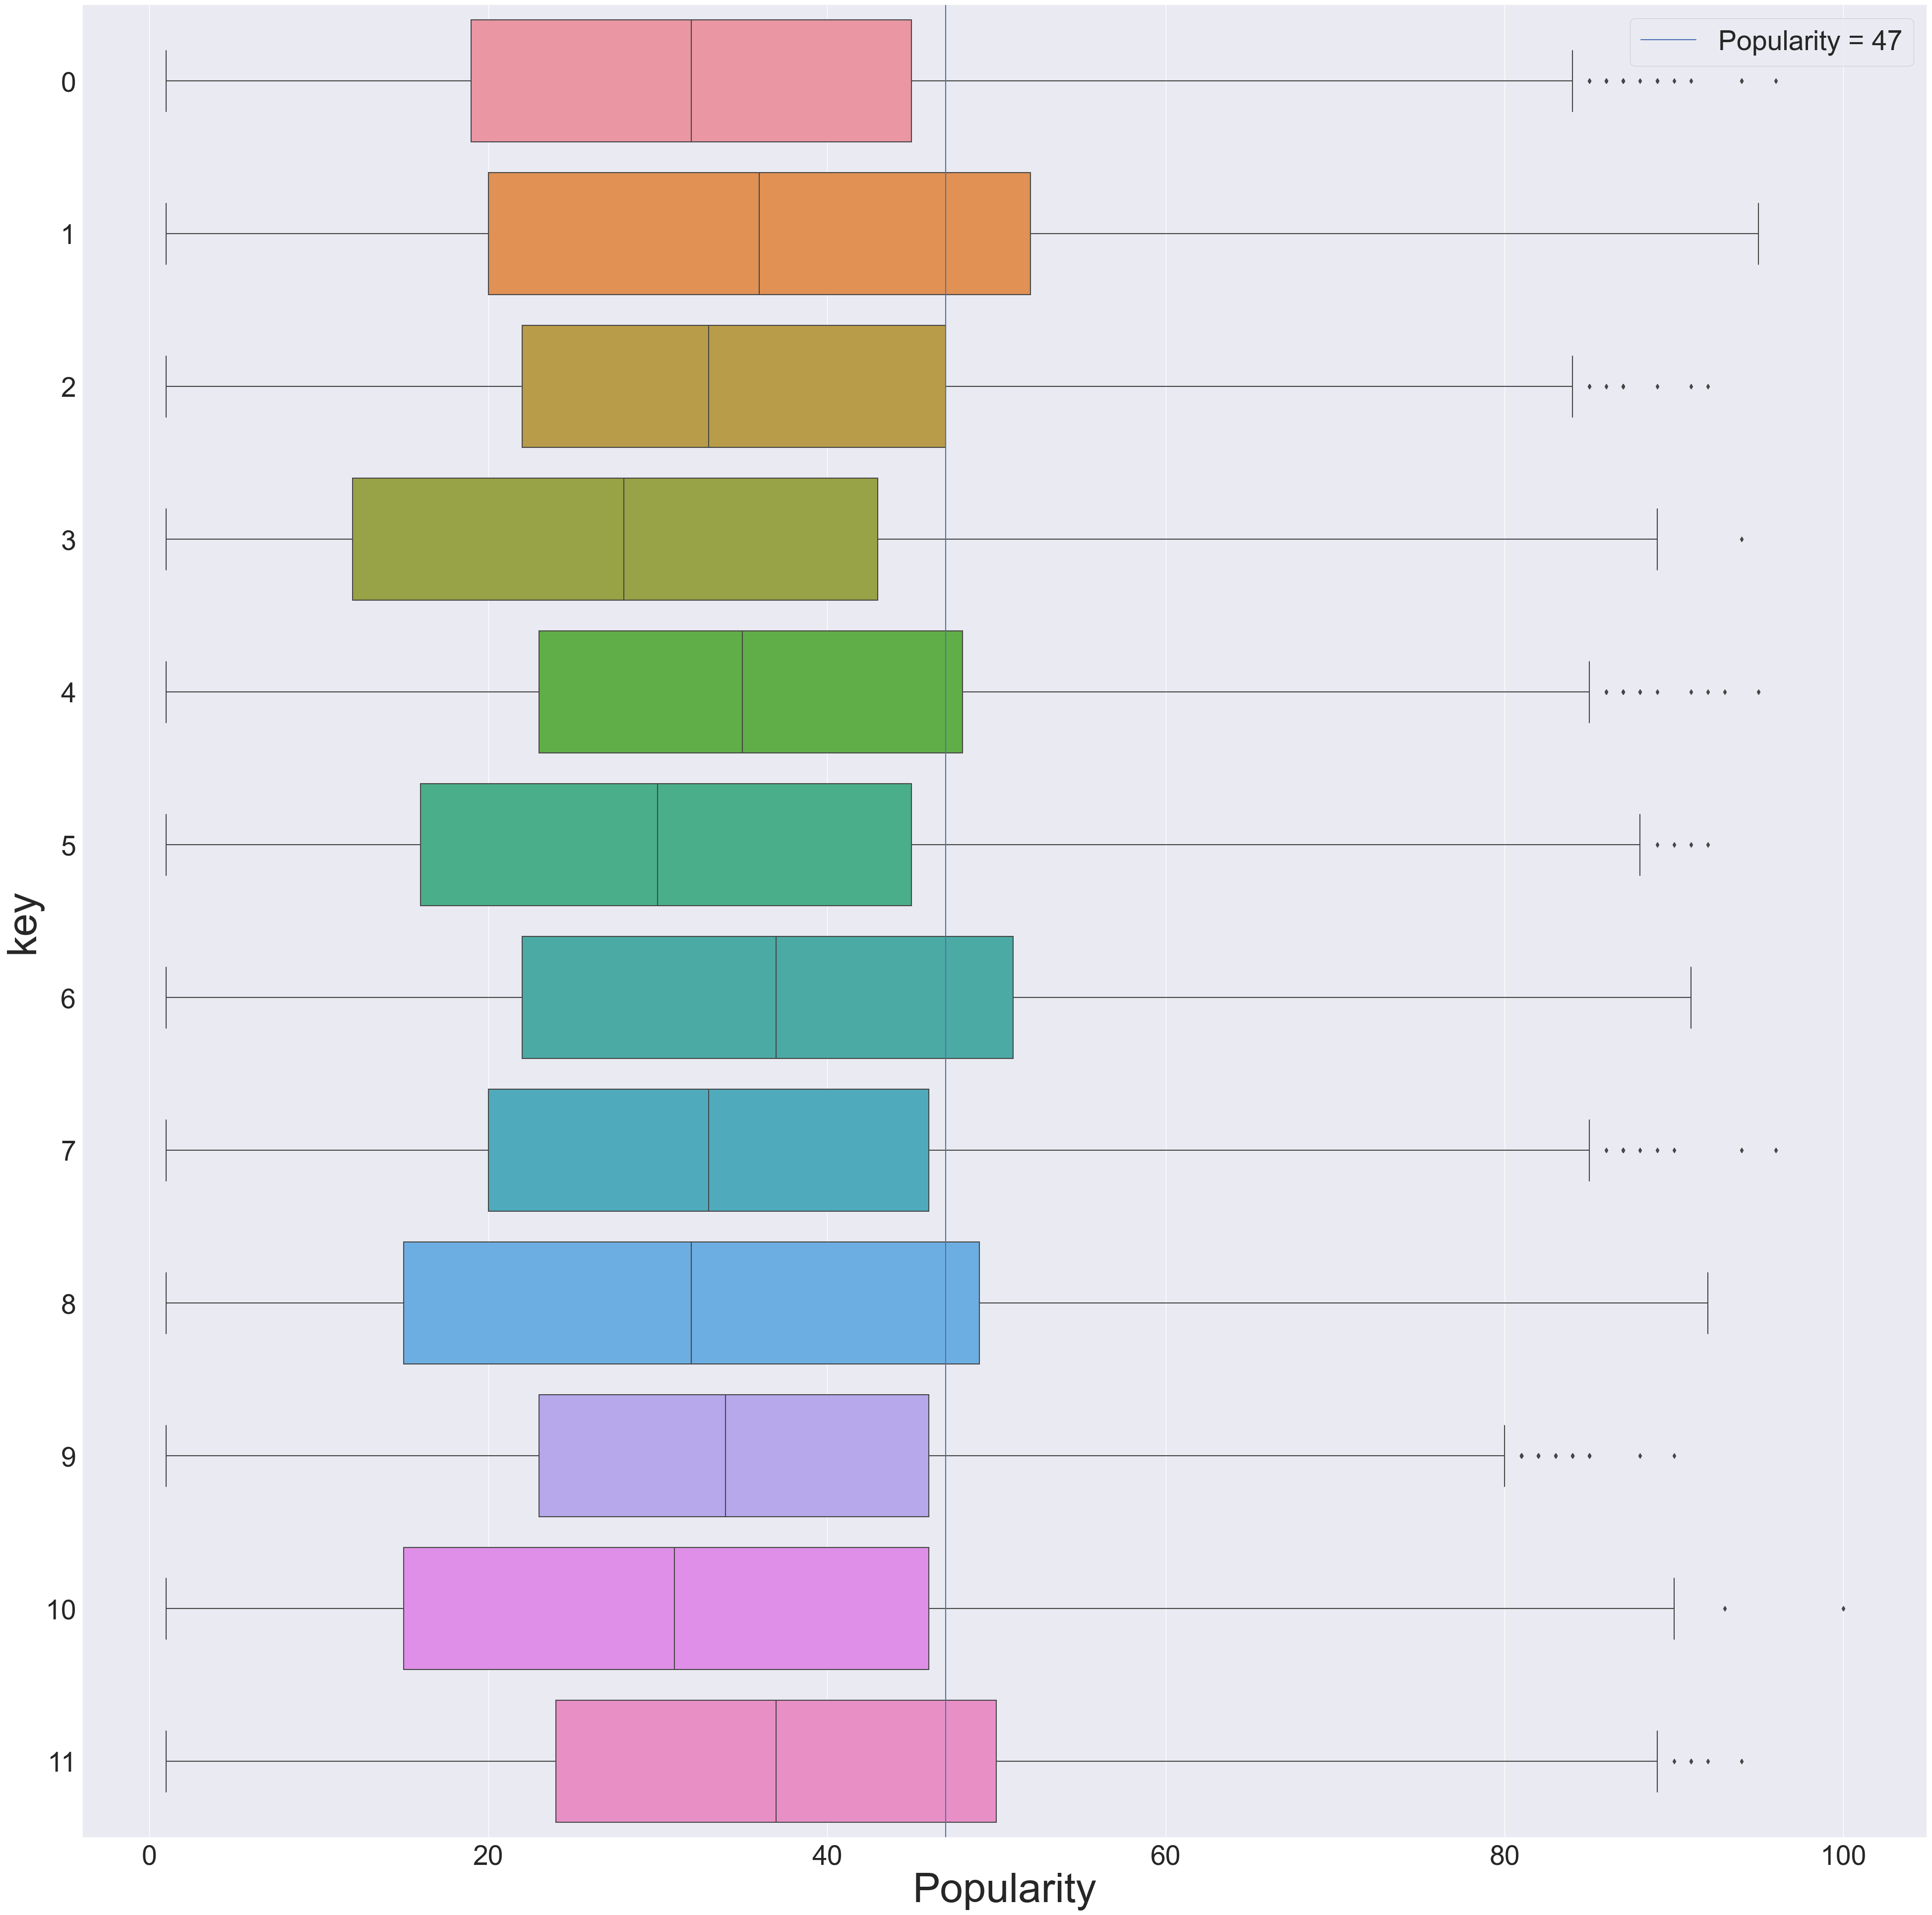

In [40]:
f, ax = plt.subplots(figsize = (48, 48))
sb.boxplot(x = "popularity", y = "key", data = categorialSongData, orient = 'h')
ax.tick_params(axis = 'y', labelsize = 40)
ax.tick_params(axis = 'x', labelsize = 40)
ax.set_xlabel("Popularity", fontsize = 60)
ax.set_ylabel("key", fontsize = 60)
plt.axvline(47, label = "Popularity = 47") #47 = popular = 75th percentile popularity score
plt.legend(fontsize = 40)
plt.show()

According to the graph, it does not matter what key the song is in. All of them are very similar in popularity. Therfore, we cannot use this to predict if a song is popular.